In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import load_boston 
import pickle
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [67]:
boston = load_boston() 
bos_data = pd.DataFrame(boston.data) 
bos_target = pd.DataFrame(boston.target)

bos_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
bos_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [69]:
bos_data.shape

(506, 13)

In [70]:
boston.feature_names = np.append(boston.feature_names,['Total'])
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Total'], dtype='<U7')

In [114]:
boston_fulldata = pd.concat([bos_data,bos_target],axis = 1)
boston_fulldata = pd.DataFrame(boston_fulldata.values, columns = boston.feature_names  )
boston_fulldata.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Total
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [72]:
boston_fulldata.shape

(506, 14)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


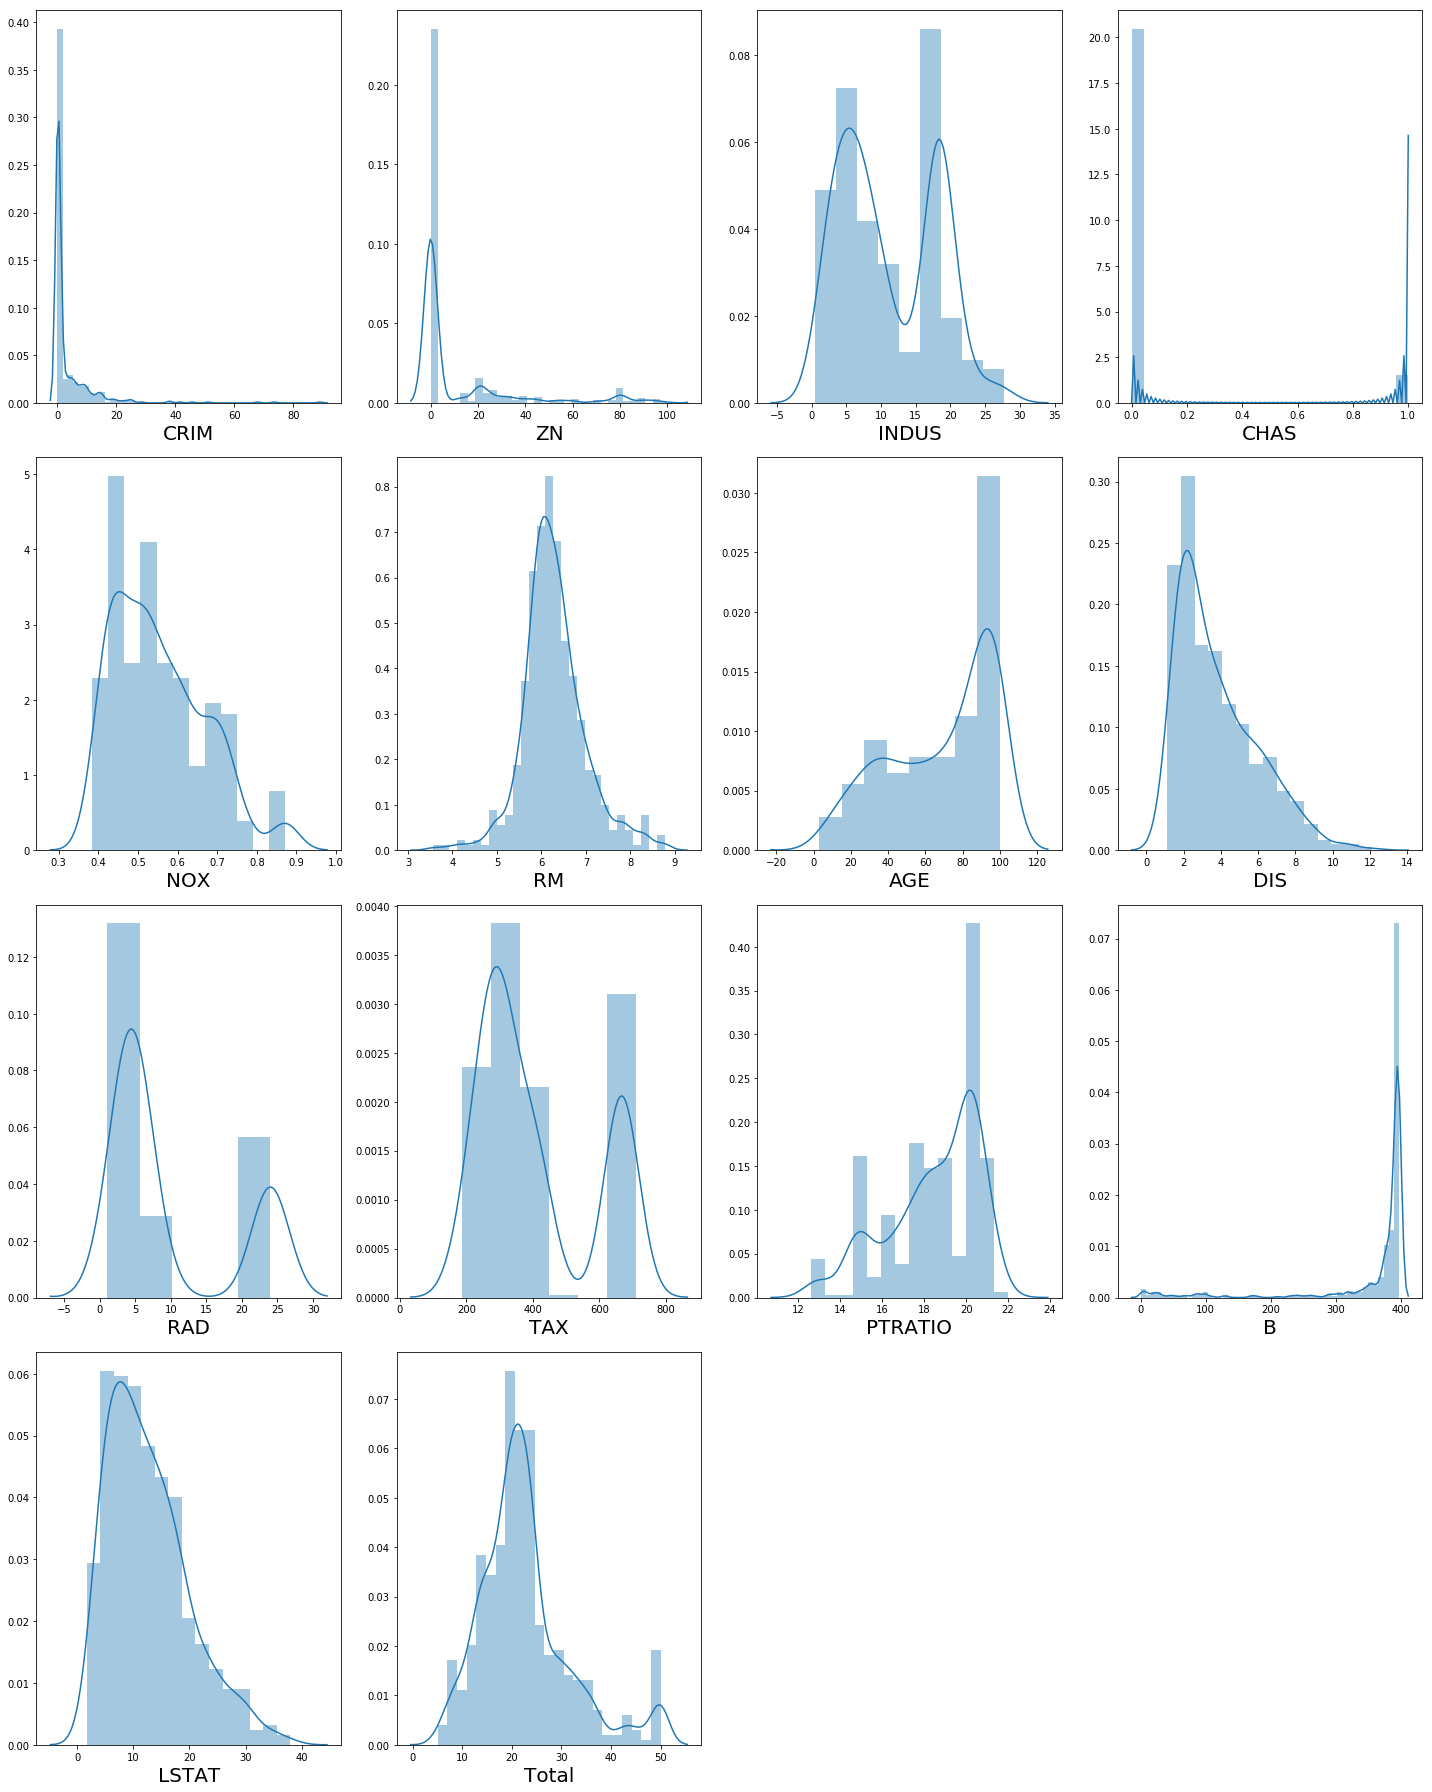

In [73]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in boston_fulldata:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(boston_fulldata[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [74]:
boston_fulldata_cpy = boston_fulldata
y = boston_fulldata['Total']
x = boston_fulldata.drop(['Total'],axis = 1)


In [75]:
y1 = boston_fulldata['Total']
x1 =  boston_fulldata.drop(['Total'],axis = 1)

In [76]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = x.columns

In [78]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [115]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.10,random_state=355)

In [116]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
pred =regression.predict(x_test)

In [118]:
regression.score(x_test,y_test)

0.8076661369667314

In [83]:
regression.score(x_train,y_train)

0.721023065623692

In [84]:
lasscv = LassoCV(alphas = None,cv =100, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=100, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [85]:
alpha = lasscv.alpha_
alpha

0.0018353315993005286

In [86]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg_pred = lasso_reg.predict(x_test)

In [87]:
lasso_reg.score(x_test,y_test)

0.8405952561508426

In [88]:
alphas = np.random.uniform(low=0, high=10, size=50)
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([8.19376, 7.12642, 4.00636, 0.67454, 7.87356, 9.98524, 1.12997,
       2.7456 , 8.8912 , 7.94102, 5.02809, 2.93208, 7.51865, 6.31394,
       8.49623, 8.35106, 7.86463, 1.51451, 5.24874, 6.91836, 8.96595,
       6.06757, 2.32299, 2.48248, 9.59412, 0.13096, 6.93129, 0.82786,
       1.8019...394, 2.07291,
       6.72219, 9.46387, 7.35702, 5.69214, 7.73409, 6.284  , 9.84265,
       7.48007]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [89]:
ridgecv.alpha_

0.13096012262262535

In [90]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
ridge_model_pred = ridge_model.predict(x_test)

In [91]:
ridge_model.score(x_test, y_test)

0.8404106508949701

In [92]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [93]:
elasticCV.alpha_

0.030019678220309348

In [94]:
elasticCV.l1_ratio

0.5

In [95]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.030019678220309348, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

# Max accuracy got in ElasticNet

In [96]:
elasticnet_reg.score(x_test, y_test)

0.8472058864257237

In [98]:
adj_r2_sc(elasticnet_reg,x_test,y_test)

0.8246340287386147

In [99]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.20,random_state=355)

In [100]:
regression1 = LinearRegression()

regression1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
regression1.score(x1_test,y1_test)

0.8402660786229563

In [102]:
adj_r2_sc(regression1,x1_test,y1_test)

0.816669022055893

In [123]:
bos_data.corr().shape



(13, 13)

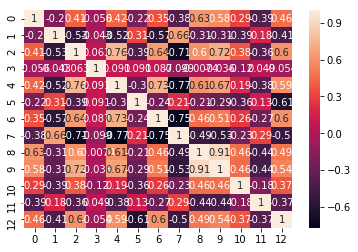

In [125]:
sns.heatmap(bos_data.corr(),annot=True)

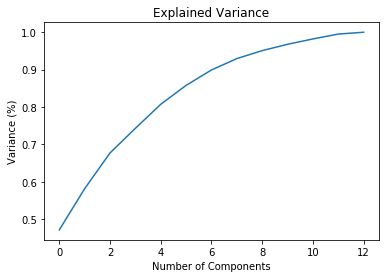

In [103]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [104]:
pca = PCA(n_components=7)#95%
new_data = pca.fit_transform(X_scaled)
x_new = pd.DataFrame(data = new_data,columns = ['C1','C2','C3','C4','C5','C6','C7'])
x_new.head()

,C1,C2,C3,C4,C5,C6,C7
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086


In [105]:
x_new.shape

(506, 7)

In [106]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x_new,y,test_size = 0.20,random_state=355)

In [107]:
regression2 = LinearRegression()

regression2.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
regression2.score(x2_test,y2_test)

0.8411454181023809

In [109]:
y2_pred = regression2.predict(x2_test)

In [112]:
def adj_r2_sc(model,x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [113]:
sc = adj_r2_sc(regression2,x2_test,y2_test)
sc

0.82931582157809